# Load necessary packages

In [1]:
import pandas as pd 
import numpy as np

hex_salmon = '#F68F83'
hex_gold = '#BC9661'
hex_indigo = '#2D2E5F'
hex_maroon = '#8C4750'
hex_white = '#FAFAFA'
hex_blue = '#7EB5D2'

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.dates import DateFormatter
import matplotlib.dates as dates

import matplotlib.font_manager as font_manager
mpl.font_manager._rebuild()

mpl.rcParams['font.family'] = 'SF Mono'
mpl.rcParams['font.weight'] = 'medium'
mpl.rcParams['axes.titleweight'] = 'semibold'
mpl.rcParams['axes.labelweight'] = 'medium'
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=[hex_indigo, hex_salmon, hex_maroon])
mpl.rcParams["figure.titlesize"] = 'large'
mpl.rcParams["figure.titleweight"] = 'semibold'

from termcolor import colored

from sklearn.model_selection import train_test_split

from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Create features

In [2]:
import import_ipynb
from data import create_features

years = [2018]
lags_ID = range(-4, -169, -1)
lags_DA = [i for i in range(5, -6, -1) if i not in [0]]
ID, DA, features = create_features(years, lags_ID, lags_DA)

importing Jupyter notebook from data.ipynb


In [3]:
ID.head(5)

,ID3
Instrument,
2018-01-01 00:00:00,14.586875
2018-01-01 01:00:00,12.990924
2018-01-01 02:00:00,22.150235
2018-01-01 03:00:00,21.917514
2018-01-01 04:00:00,21.621781


In [4]:
DA.head(5)

,MCP
Instrument,
2018-01-01 00:00:00,27.20
2018-01-01 01:00:00,27.30
2018-01-01 02:00:00,30.10
2018-01-01 03:00:00,20.87
2018-01-01 04:00:00,25.56


In [5]:
features.head(5)

,ID3,MCP,Load,Load forecast,ID3 (-4),ID3 (-5),ID3 (-6),ID3 (-7),ID3 (-8),ID3 (-9),...,HOD 14,HOD 15,HOD 16,HOD 17,HOD 18,HOD 19,HOD 20,HOD 21,HOD 22,HOD 23
2018-01-01 05:00:00,22.352647,25.58,9768.25,11085.25,25.114449,24.868167,25.978476,26.555409,28.621735,29.089427,...,0,0,0,0,0,0,0,0,0,0
2018-01-01 06:00:00,23.071457,25.81,10069.75,12266.50,24.868167,25.978476,26.555409,28.621735,29.089427,35.102530,...,0,0,0,0,0,0,0,0,0,0
2018-01-01 07:00:00,24.345686,29.90,10408.75,14147.50,25.978476,26.555409,28.621735,29.089427,35.102530,41.704858,...,0,0,0,0,0,0,0,0,0,0
2018-01-01 08:00:00,25.257541,26.33,10693.25,15932.50,26.555409,28.621735,29.089427,35.102530,41.704858,48.812172,...,0,0,0,0,0,0,0,0,0,0
2018-01-01 09:00:00,25.114449,26.38,11050.25,16809.75,28.621735,29.089427,35.102530,41.704858,48.812172,45.161106,...,0,0,0,0,0,0,0,0,0,0


# Separate train and test sets

In [6]:
X = features.drop(labels=['ID3', 'Load forecast'], axis=1)
y = features['ID3']

# X = X.iloc[X.index.hour == h]
# y = y.iloc[y.index.hour == h]

# X = X.iloc[X.index.day == 13]
# y = y.iloc[y.index.day == 13]

# X = X.iloc[X.index.month == 8]
# y = y.iloc[y.index.month == 8]

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.3,
    random_state = 0,
    shuffle = True)

X_train.shape, X_test.shape

((5485, 208), (2351, 208))

In [7]:
X_train.head(5)

,MCP,Load,ID3 (-4),ID3 (-5),ID3 (-6),ID3 (-7),ID3 (-8),ID3 (-9),ID3 (-10),ID3 (-11),...,HOD 14,HOD 15,HOD 16,HOD 17,HOD 18,HOD 19,HOD 20,HOD 21,HOD 22,HOD 23
2018-05-16 06:00:00,45.95,13045.25,52.048565,56.466106,55.803371,49.850349,39.239290,38.634824,35.583682,35.899573,...,0,0,0,0,0,0,0,0,0,0
2018-05-13 21:00:00,45.36,11699.25,27.564193,22.965320,32.286348,45.793014,47.812601,54.924623,56.682175,67.751984,...,0,0,0,0,0,0,0,1,0,0
2018-08-10 01:00:00,43.61,10433.25,52.849302,55.768051,57.241001,52.569062,50.069484,47.379871,45.848404,45.531082,...,0,0,0,0,0,0,0,0,0,0
2018-01-09 05:00:00,36.50,11760.25,95.310205,59.578985,51.693293,48.433655,49.774116,52.574291,57.329657,62.002556,...,0,0,0,0,0,0,0,0,0,0
2018-09-05 09:00:00,80.10,15430.75,76.792366,76.317262,74.707572,70.666117,58.594634,58.683871,72.054730,92.842614,...,0,0,0,0,0,0,0,0,0,0


# Feature scaling

In [8]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

# LASSO

Specify logistic regression model via LogisticicRegression() with LASSO (l1) penalty and then select features via SelectFromModel()

It is necessary to encode training labels

In [9]:
# sel_ = SelectFromModel(
#     LogisticRegression(C=0.5, penalty='l1', solver='liblinear', random_state=10))

# sel_.fit(scaler.transform(X_train), y_train)

In [10]:
lab_enc = LabelEncoder()
y_train = lab_enc.fit_transform(y_train)

sel_ = SelectFromModel(Lasso(alpha=100, random_state=10))
sel_.fit(scaler.transform(X_train), y_train)

SelectFromModel(estimator=Lasso(alpha=100, random_state=10))

# Visualise 

In [11]:
print(), print('Selected columns:'), print()
print(sel_.get_support())


Selected columns:

[ True  True  True False False False False False False False False False
  True False False False False False False False False  True  True False
 False False False False False False False False False False False False
 False False False False False False False False False  True False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False 

In [12]:
print(), print(colored('Summary:', 'blue')), print()

print(f'Total features: {X_train.shape[1]}')
print(f'Selected features: {len(X_train.columns[(sel_.get_support())])}')
print(f'Features with coefficients shrank to zero: {np.sum(sel_.estimator_.coef_ == 0)}')

print(), print(colored('Selected columns:', 'blue')), print()
print(X_train.columns[sel_.get_support()])


Summary:

Total features: 208
Selected features: 14
Features with coefficients shrank to zero: 194

Selected columns:

Index(['MCP', 'Load', 'ID3 (-4)', 'ID3 (-14)', 'ID3 (-23)', 'ID3 (-24)',
       'ID3 (-47)', 'ID3 (-168)', 'MCP (5)', 'MCP (-1)', 'MCP (-2)',
       'MCP (-3)', 'MCP (-4)', 'MCP (-5)'],
      dtype='object')


In [13]:
# Read out attributes
sel_.estimator_.coef_         # dense np.array
# sel_.estimator_.sparse_coef_  # sparse matrix

# sel_.estimator_.intercept_    # probably also relevant

array([131.3358076 , 103.03704281, 318.76703589,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
        25.46677554,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,  47.91750584,  57.1913371 ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,  14.65289294,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
        -0.        ,  -0.        ,  -0.        ,  -0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.  

In [14]:
coefficients = pd.DataFrame()

for h in range(0, 24):

    X = features.drop(labels=['ID3', 'Load forecast'], axis=1)
    y = features['ID3']

    X = X.iloc[X.index.hour == h]
    y = y.iloc[y.index.hour == h]

    X_train, X_test, y_train, y_test = train_test_split(
        X,
        y,
        test_size = 0.3,
        random_state = 0,
        shuffle = True)

    scaler = StandardScaler()
    scaler.fit(X_train)

    lab_enc = LabelEncoder()
    y_train = lab_enc.fit_transform(y_train)

    sel_ = SelectFromModel(Lasso(alpha=1e-1, random_state=10))
    sel_.fit(scaler.transform(X_train), y_train)

    coefficients[f'H {h}'] = sel_.estimator_.coef_

    print(), print(colored('Selected columns:', 'blue')), print()
    print(X_train.columns[sel_.get_support()])

coefficients = coefficients.set_index([X_train.columns])


Selected columns:

Index(['MCP', 'Load', 'ID3 (-4)', 'ID3 (-7)', 'ID3 (-8)', 'ID3 (-10)',
       'ID3 (-11)', 'ID3 (-13)', 'ID3 (-18)', 'ID3 (-20)',
       ...
       'MCP (-1)', 'MCP (-2)', 'MCP (-4)', 'MCP (-5)', 'DOW 0', 'DOW 1',
       'DOW 2', 'DOW 4', 'DOW 5', 'DOW 6'],
      dtype='object', length=116)

Selected columns:

Index(['MCP', 'Load', 'ID3 (-4)', 'ID3 (-5)', 'ID3 (-6)', 'ID3 (-7)',
       'ID3 (-9)', 'ID3 (-10)', 'ID3 (-11)', 'ID3 (-12)',
       ...
       'MCP (2)', 'MCP (-1)', 'MCP (-3)', 'MCP (-4)', 'MCP (-5)', 'DOW 0',
       'DOW 2', 'DOW 3', 'DOW 5', 'DOW 6'],
      dtype='object', length=122)

Selected columns:

Index(['MCP', 'Load', 'ID3 (-4)', 'ID3 (-5)', 'ID3 (-8)', 'ID3 (-9)',
       'ID3 (-11)', 'ID3 (-12)', 'ID3 (-14)', 'ID3 (-15)',
       ...
       'MCP (2)', 'MCP (-1)', 'MCP (-2)', 'MCP (-3)', 'MCP (-4)', 'MCP (-5)',
       'DOW 0', 'DOW 3', 'DOW 4', 'DOW 6'],
      dtype='object', length=125)

Selected columns:

Index(['MCP', 'Load', 'ID3 (-4)', 'ID3 (

In [15]:
importances = pd.DataFrame()

for h in range(0, 24):
    importances[f'H {h}'] = coefficients[f'H {h}'] / coefficients[f'H {h}'].abs().sum()

importances = importances.set_index([X_train.columns])

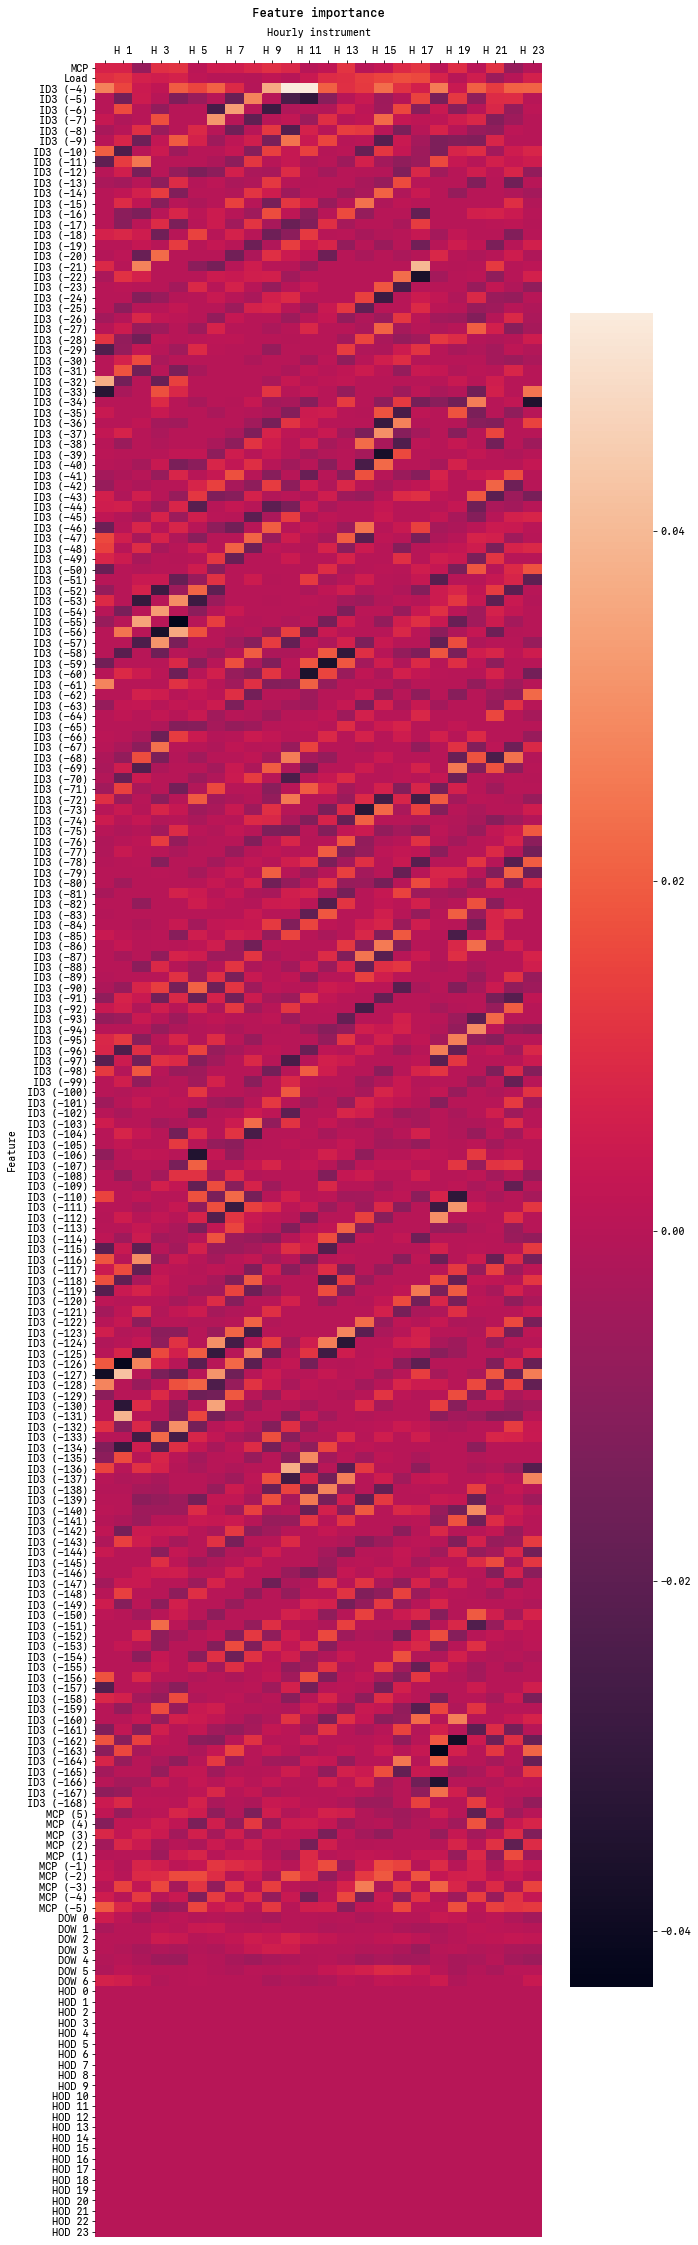

In [16]:
fig, ax = plt.subplots(figsize = (10, 40))
sns.heatmap(ax = ax, data = importances)

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

for label in ax.xaxis.get_ticklabels()[::2]:
    label.set_visible(False)

ax.set_xlabel('Hourly instrument', labelpad = 10)
ax.set_ylabel('Feature', labelpad = 10)

ax.set_title(f'Feature importance', pad = 10);